In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [44]:
print(data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [46]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [47]:
print("*****features*****")
print(iris.feature_names)

*****features*****
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
le=LabelEncoder()
y_new=le.fit_transform(y)
print(y_new)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=.25,random_state=None)
print(y_test)

[0 0 1 0 1 1 2 1 2 2 2 2 0 1 2 0 0 1 1 0 0 2 2 1 1 2 0 2 0 0 0 1 0 0 1 2 1
 1]


In [55]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_predict=nb.predict(x_test)
print("----------------------Test Class-------------------------\n",y_test)
print("\n---------------------Predict Class----------------------\n",y_predict)
#print(nb.predict_proba(x_test))

----------------------Test Class-------------------------
 [0 0 1 0 1 1 2 1 2 2 2 2 0 1 2 0 0 1 1 0 0 2 2 1 1 2 0 2 0 0 0 1 0 0 1 2 1
 1]

---------------------Predict Class----------------------
 [0 0 1 0 1 1 2 1 2 2 2 2 0 1 2 0 0 1 1 0 0 2 2 1 1 2 0 1 0 0 0 1 0 0 1 2 1
 1]


37
[[14  0  0]
 [ 0 13  0]
 [ 0  1 10]]


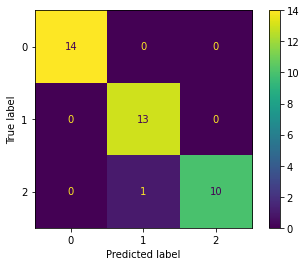

In [61]:
print(accuracy_score(y_test,y_predict,normalize=False))
cm=confusion_matrix(y_test,y_predict,normalize=None,labels=nb.classes_)
print(cm)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_dis.plot()
plt.show()

In [60]:
    print(accuracy_score(y_test,y_predict,normalize=False))

37
